In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import tensorflow as tf

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)

## Illustrate Linear Regression

In [4]:
X = np.arange(0.0, 5.0, 0.1)
m = 1.8 # slope or coefficient or gradient
b = 0.4 # intercept
y = m * X + b

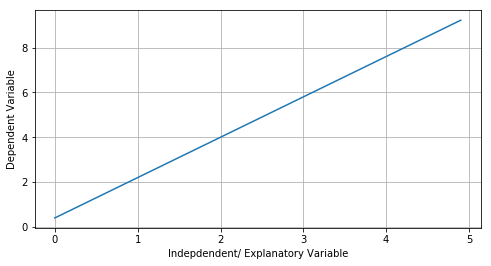

In [5]:
plt.plot(X, y)
plt.xlabel('Indepdendent/ Explanatory Variable')
plt.ylabel('Dependent Variable')
plt.grid(True)
plt.show()

## Load Datasets

In [6]:
df_fuel = pd.read_csv('./datasets/FuelConsumption.csv')
df_fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
X_train = np.asanyarray(df_fuel[['ENGINESIZE']])
y_train = np.asanyarray(df_fuel[['CO2EMISSIONS']])

In [8]:
m = tf.Variable(20.0) # random guess
b = tf.Variable(30.2)
y = m * X_train + b

## Set Loss Function

In [9]:
loss = tf.reduce_mean(tf.square(y - y_train))

## Set Optimizer

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05, name='GradientDescent')

In [11]:
train = optimizer.minimize(loss)

## Train The Graph

In [12]:
init = tf.global_variables_initializer()

In [13]:
with tf.Session() as sess:
    sess.run(init) # initialize the variables before executing a graph
    
    loss_values = []
    train_data = []

    for step in range(100):

        _, loss_val, m_val, b_val = sess.run([train, loss, m, b])
        loss_values.append(loss_val)

        if step % 5 == 0:
            print(f'Episode: {step}, Loss: {loss_val}, M Val: {m_val}, B Val: {b_val}')
            train_data.append([m_val, b_val])

Episode: 0, Loss: 26992.59375, M Val: 77.07106018066406, B Val: 46.11027526855469
Episode: 5, Loss: 1891.720458984375, M Val: 58.84461975097656, B Val: 47.59572982788086
Episode: 10, Loss: 1762.72412109375, M Val: 57.651039123535156, B Val: 53.019832611083984
Episode: 15, Loss: 1653.5897216796875, M Val: 56.366519927978516, B Val: 58.023921966552734
Episode: 20, Loss: 1559.0440673828125, M Val: 55.17284393310547, B Val: 62.68204116821289
Episode: 25, Loss: 1477.13720703125, M Val: 54.06179428100586, B Val: 67.01764678955078
Episode: 30, Loss: 1406.178955078125, M Val: 53.02766418457031, B Val: 71.05309295654297
Episode: 35, Loss: 1344.7056884765625, M Val: 52.06513595581055, B Val: 74.80913543701172
Episode: 40, Loss: 1291.4505615234375, M Val: 51.16924285888672, B Val: 78.30512237548828
Episode: 45, Loss: 1245.314453125, M Val: 50.33538055419922, B Val: 81.55907440185547
Episode: 50, Loss: 1205.3450927734375, M Val: 49.55924987792969, B Val: 84.58775329589844
Episode: 55, Loss: 1170.7

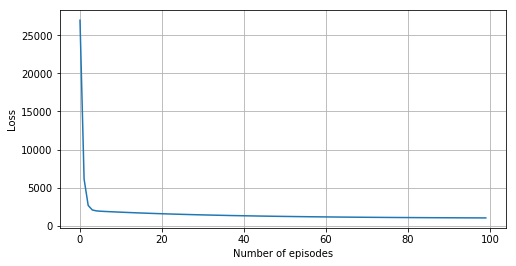

In [14]:
plt.plot(loss_values)
plt.xlabel('Number of episodes')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## Show Linear Model

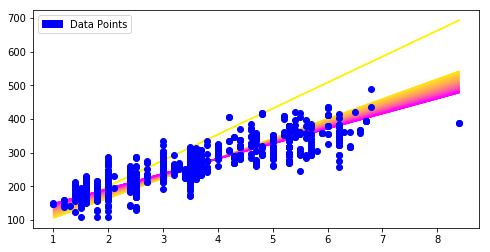

In [15]:
# visualize how the coefficient and intercept of line has changed to fit the data

cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(X_train)
    line = plt.plot(X_train, f_y)
    plt.setp(line, color=(cr,cg,cb))
    
plt.plot(X_train, y_train, 'ro', color='blue')

green_line = mpatches.Patch(color='blue', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

---